In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from sklearn import preprocessing

In [2]:
df_ipl=pd.read_csv(r"C:\Users\Ramana Reddy (Rakhi)\OneDrive\Desktop\DATA SETS\ipl_data.csv")
df_ipl

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,21-05-2017,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,21-05-2017,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,21-05-2017,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,21-05-2017,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


In [3]:
df_ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [5]:
df_ipl.tail()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
76009,617,21-05-2017,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,21-05-2017,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,21-05-2017,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,21-05-2017,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129
76013,617,21-05-2017,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129,8,19.6,47,1,47,13,129


In [6]:
df_ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [8]:
df_ipl.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [9]:
df_ipl.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [11]:
df_ipl.duplicated().sum()

0

# Data Pre-processing

Dropping unimportant features
* we have created a new dataframe by dropping several columns from the original dataframe
* The new dataframe contains the remaining columns that we are going to train the predictive model.

In [21]:
# dropping certain features
dff_ipl=df_ipl.drop(['date','runs','wickets','overs','runs_last_5','wickets_last_5','mid','striker','non-striker'],axis=1)
dff_ipl.head()

,venue,bat_team,bowl_team,batsman,bowler,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222


* we have split the data frame into independent variable (X) and dependent variables(y). Our dependent variables is the total score.

In [20]:
X=dff_ipl.drop(['total'],axis=1)
y=dff_ipl['total']

# Lable Encoding

* We have applied label encoding to your categorical features in X.
* We have created separate Labelencoder objects for each categorical feature and encoded their values.
* we have created mappings to convert the encoded labels back to their original values, which can be helpful for interpreting the results.

In [22]:
#label encoding
from sklearn.preprocessing import LabelEncoder
#create a labelencoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

#Fit and transform the categorical features with label
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

# Train Test split

* we have split the data into training and testing sets. The training set contains 70 percent of the dataset and rest 30 percent is inn test set.

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Feature Scaling

* We have performed Min-Max scaling on our input features to ensure all the features are on the same scale
* Scaling is performed to ensure consistent scale to improve model performance.
* Scaling has trasformed both training and testing data using the scaling parameters.

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#fit the scaler on the training data and transform both training and testing data
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler. transform(X_test)

# Define the Neural Network

* we have defined a neural network using TensorFlow and Keras for regression.
* After defining the model, we have compiled the model using the Huber Loss because of the robusness of the regression against outliers.

In [30]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)#use huber loss for regression

In [31]:
model.fit(X_train_scaled,y_train,epochs=50,batch_size=64,validation_data=(X_test_scaled,y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 57.5465 - val_loss: 22.0888
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.3820 - val_loss: 22.6335
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.4302 - val_loss: 22.2071
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.1917 - val_loss: 21.9314
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.2294 - val_loss: 21.8926
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 22.2564 - val_loss: 22.0198
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.2613 - val_loss: 21.9263
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.1955 - val_loss: 21.8124
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.0660 - val_loss: 21.8203
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.0505 - val_loss: 21.7703
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 21.9935 - val_loss: 21.7963
Epoch 12/50
832/832 ━━━━━━━━━━

<AxesSubplot:>

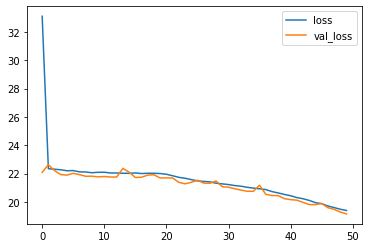

In [32]:
model_losses= pd.DataFrame(model.history.history)
model_losses.plot()

# Model Evaluation

* We have predicted using the trained neural network on the testing data.
* The variable predictions contains the predicted total run scores for the test set based on the model's learned patterns.

In [33]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


19.650625229300022

# Let’s create an Interactive Widget

* We have created an interactive widget using ipywidgets to predict the score based on user input for venue, batting team, bowling team, striker, and bowler.
* We have created dropdown widgets to select values for venue, batting team, bowling team, striker, and bowler.
* Then, we have added a “Predicted Score” button widget. Whenever, the button will be clicked, the predict_score function will be called and then perform the following steps:
    * Decodes the user-selected values to their original categorical values.
    * Encodes and scales these values to match the format used in model training.
    * Uses the trained model to make a prediction based on the user’s input.
    * Displays the predicted score.
    

In [35]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=dff_ipl['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =dff_ipl['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=dff_ipl['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=dff_ipl['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=dff_ipl['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()  # Clear the previous output
        

        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)

* The widget-based interface allows you to interactively predict the score for specific match scenarios. Now, we have set up the button to trigger the predict_score function when clicked and display the widgets for venue, batting team , bowling team, striker and bowler.

In [37]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue,batting_team,bowling_team,striker,bowler,predict_button,output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()

We have predicted the score of the match between CSK and King XI Punjab in Punjab Cricket Stadium. The predicted score of the match is 183.

By harnessing the power of ML and DL, we have successfully predicted the cricket scores based on historical data. The model’s ability to predict cricket scores can be a valuable asset for IPL enthusiasts, teams, and analysts. It can provide insights into the dynamics of a match and help anticipate how different factors impact the final score.

# Conclusion:

In conclusion, the application of deep learning in IPL score prediction represents a transformative approach to cricket analytics. By harnessing the power of advanced algorithms and historical data, teams and analysts can forecast match outcomes with greater accuracy than ever before. This not only enhances strategic decision-making during live matches but also enriches the fan experience by providing real-time insights and predictions. As technology continues to evolve, the future of cricket analytics promises to be increasingly data-driven, offering new opportunities to unravel the complexities of the game and elevate its competitive edge.

